In [1]:
import torch
import torchani
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#df = pd.read_parquet('comp6v1_forces_df.pq')  # 16.5GB -> 71GB

In [3]:
df = pd.read_parquet("cos_sim-mag_df-comp6v1.pq")
#forces_df = pd.read_csv('cos_sim-forces_df-comp6v1.csv')

In [4]:
#coef_var = df['Stdev magnitudes']/df['Mean magnitudes']
#df['coef_var'] = coef_var

In [7]:
plt.rcParams['figure.dpi'] = 200

df

,Dataset magnitudes,Members magnitudes,Mean magnitudes,Stdev magnitudes,Difference,Cos Sim,Mean Cos Sim
Species,,,,,,,
8,44.131485,"[47.4202880859375, 47.957828521728516, 47.6872...",47.702065,0.345540,3.570580,"[0.9963681101799011, 0.9970769882202148, 0.996...",0.996900
8,26.311531,"[24.941083908081055, 25.621509552001953, 26.16...",25.779211,0.700936,0.532320,"[0.9956550002098083, 0.9971144199371338, 0.996...",0.997440
7,25.288063,"[25.648221969604492, 26.222124099731445, 24.69...",25.356699,1.379826,0.068636,"[0.9919087886810303, 0.9929472208023071, 0.992...",0.998172
6,41.613338,"[36.9962043762207, 40.40073013305664, 36.89282...",38.823441,2.061463,2.789898,"[0.9967887997627258, 0.9993398785591125, 0.996...",0.999131
6,52.448895,"[55.75788497924805, 53.190185546875, 54.268363...",54.232803,1.134321,1.783909,"[0.9997154474258423, 0.9970396757125854, 0.997...",0.998311
...,...,...,...,...,...,...,...
1,68.779701,"[71.331298828125, 68.89674377441406, 71.264801...",70.147949,0.874175,1.368248,"[0.9995378255844116, 0.9999842643737793, 0.999...",0.999866
1,68.433670,"[69.75824737548828, 67.96791076660156, 70.0074...",68.918198,1.245902,0.484528,"[0.9999275207519531, 0.9997493624687195, 0.999...",0.999969
1,79.199509,"[81.9066162109375, 82.44889831542969, 83.36268...",82.747955,0.519332,3.548447,"[0.9982447624206543, 0.9994766712188721, 0.999...",0.999257


In [1]:
plt.rcParams['figure.dpi'] = 200
bins = math.isqrt(len(df))
xquant = np.quantile(df['Dataset magnitudes'],0.999)
yquant = np.quantile(df['Mean magnitudes'],0.999)
plt.hist2d(df['Dataset magnitudes'], df['Mean magnitudes'], bins=bins, cmin=1, range=[[0,xquant],[0,yquant]])
plt.xlabel('Dataset magnitude')
plt.ylabel('Mean predicted magnitude')
plt.show()

NameError: name 'plt' is not defined

In [10]:
df['x-range'] = (df['Members magnitudes'].apply(max) - df['Members magnitudes'].apply(min)) / df['Mean magnitudes']

In [17]:
re_df = df.reset_index()
idx_max = re_df['x-range'].idxmax()
idx_min = re_df['x-range'].idxmin()

In [18]:
re_df.loc[idx_max]

Species                                                                1
Dataset magnitudes                                              0.349371
Members magnitudes     [0.37284591794013977, 0.817669689655304, 0.627...
Mean magnitudes                                                 0.012488
Stdev magnitudes                                                0.331114
Difference                                                      0.336883
Cos Sim                [0.19593432545661926, 0.5144465565681458, -0.7...
Mean Cos Sim                                                     0.40351
x-range                                                        74.410168
Relative difference                                             0.964256
Name: 1633358, dtype: object

In [19]:
df['Difference'].mean()

2.078244827078262

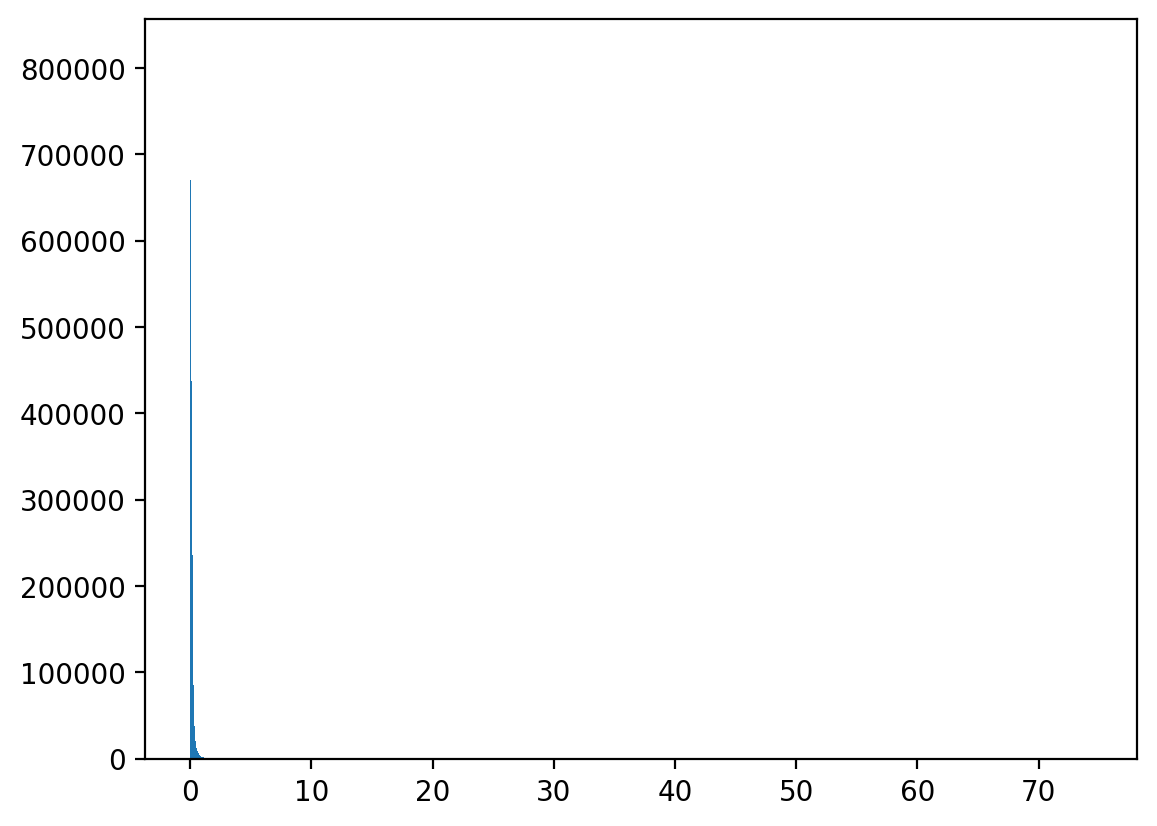

In [20]:
bins = math.isqrt(len(df['x-range'].values))
plt.hist(df['x-range'], bins=bins)#, range=[0,cut])
plt.show()

In [21]:
df['x-range'].mean()

0.12823102547604306

1.8230554301936648
14693


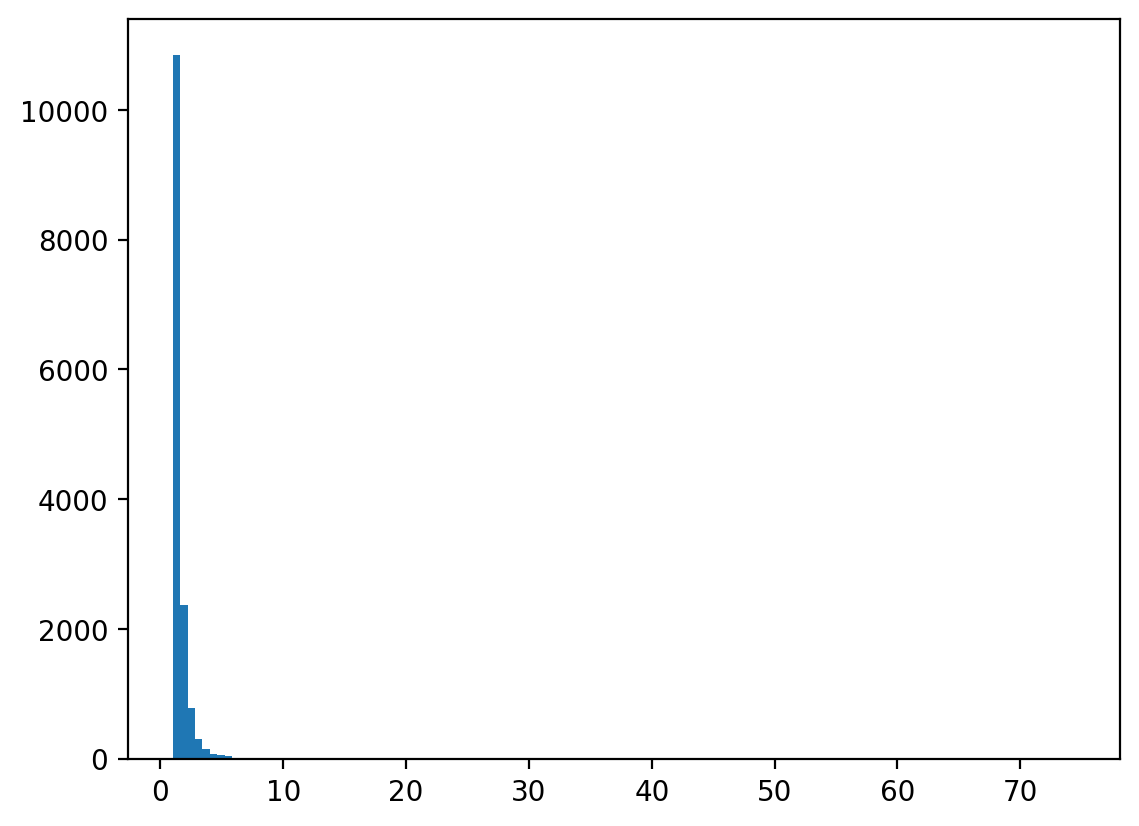

In [22]:
percentile = df['x-range'].quantile(0.999)
print(percentile)
top_percentile = df[df['x-range'] > 1]
print(len(top_percentile))
bins = math.isqrt(len(top_percentile))
plt.hist(top_percentile['x-range'], bins=bins)#, range=[10,max(df['Abs Z-score sum'])])
plt.show()

In [11]:
df['Relative difference'] = df['Difference']/df['Dataset magnitudes']

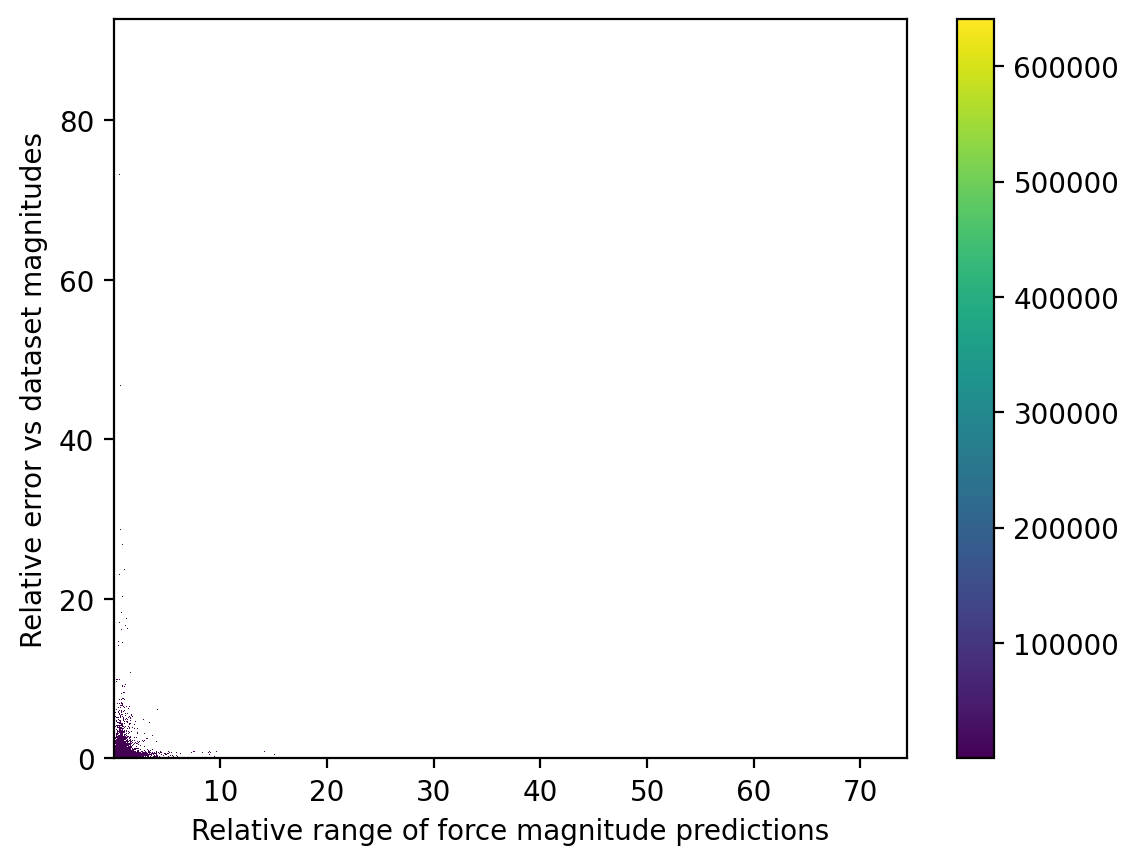

In [14]:

plt.rcParams['figure.dpi'] = 200
xquant = np.quantile(df['x-range'],0.999)
yquant = np.quantile(df['Relative difference'],0.999)
plt.hist2d(df['x-range'],df['Relative difference'], bins=math.isqrt(len(df)), cmin=1)#, range=[[0,xquant],[0,yquant]])
plt.xlabel('Relative range of force magnitude predictions')
plt.colorbar()
plt.ylabel('Relative error vs dataset magnitudes')
plt.show()

In [9]:
df['Coef_var'] = df['Stdev magnitudes']/df['Mean magnitudes']

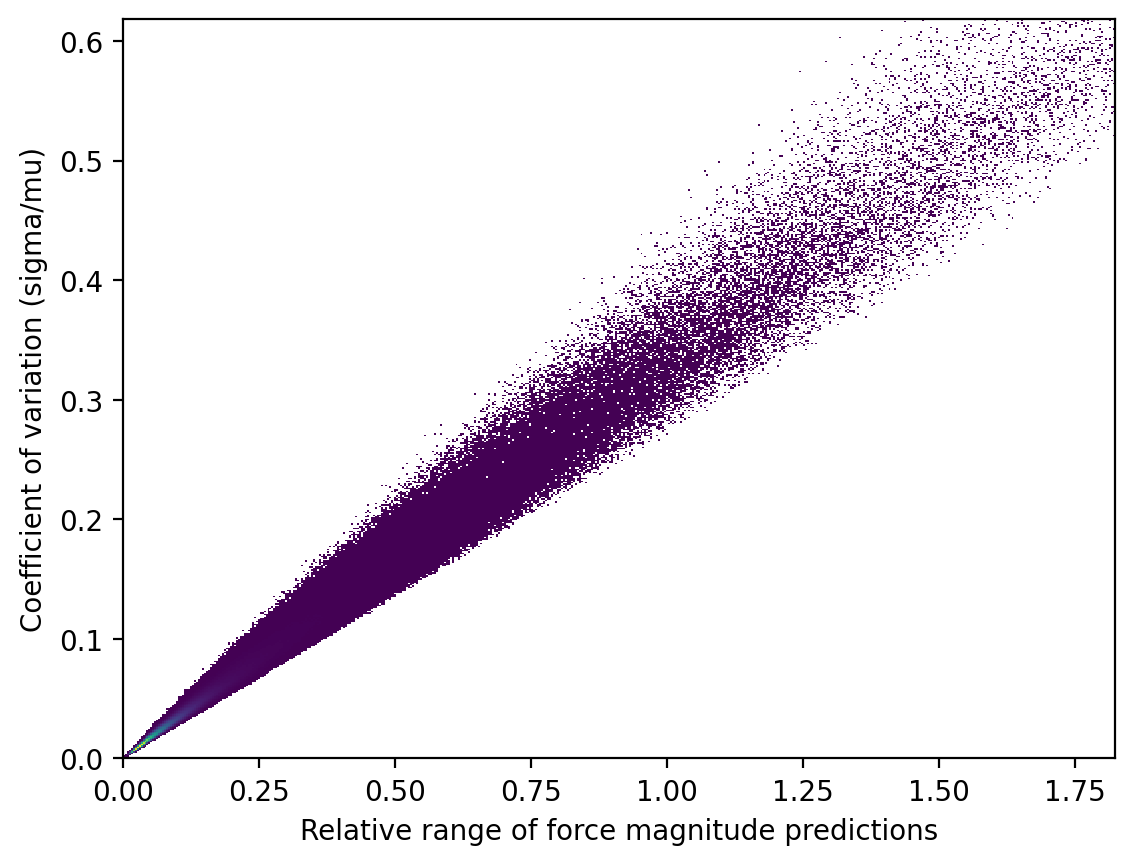

In [28]:
xquant = np.quantile(df['x-range'],0.999)
yquant = np.quantile(df['Coef_var'],0.999)
plt.hist2d(df['x-range'],df['Coef_var'], bins=500, cmin=1, range=[[0,xquant],[0,yquant]])
plt.xlabel('Relative range of force magnitude predictions')
plt.ylabel('Coefficient of variation (sigma/mu)')
plt.show()

In [30]:
df['x-range'].corr(df['Coef_var'])

0.9941517242806126

In [31]:
print(len(top_percentile))
top_percentile.mean(), df.mean()

14693


/tmp/ipykernel_23704/551328147.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  top_percentile.mean(), df.mean()


(Dataset magnitudes     8.471963
 Mean magnitudes        7.690519
 Stdev magnitudes       3.784121
 Difference             3.339755
 Mean Cos Sim           0.610411
 x-range                1.542383
 Relative difference    0.573821
 dtype: float64,
 Dataset magnitudes     48.081617
 Mean magnitudes        48.029019
 Stdev magnitudes        1.424735
 Difference              2.078245
 Mean Cos Sim            0.987028
 x-range                 0.128231
 Relative difference     0.065273
 Coef_var                0.043445
 dtype: float64)

In [17]:
df['Z-score'] = df.apply(lambda row: [(member - row['Mean magnitudes']) / row['Stdev magnitudes'] for member in row['Members magnitudes']], axis=1)

In [18]:
df['Abs Z-score sum'] = df['Z-score'].apply(lambda z_scores: sum(abs(score) for score in z_scores))

In [19]:
len(df['Abs Z-score sum'])

2608858

In [ ]:
max(df['Abs Z-score sum'])

In [ ]:
df['Abs Z-score sum'].mean()

In [ ]:
matplotlib.rcParams['font.family'] = 'Times New Roman'

In [ ]:
bins = math.isqrt(len(df['Abs Z-score sum'].values))
plt.hist(df['Abs Z-score sum'], bins=bins)#, range[[0,max(df['Abs Z-score sum'])],[0,10]])
plt.xlabel('Sum of z-score absolute values across ensemble')
plt.show()

In [6]:
df['Difference'].idxmax()

6

In [6]:
h_df = df.loc[1]
c_df = df.loc[6]
n_df = df.loc[7]
o_df = df.loc[8]

In [7]:
'''font = {'family': 'serif',
        'serif':  'Times New Roman',
        'color':  'violet',
        'weight': 'normal',
        'size': 16,
        }
'''

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Times New Roman') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 12, 'font.serif':'Times New Roman'})

In [10]:
df['Relative difference'] = df['Difference']/df['Dataset magnitudes']

2608858


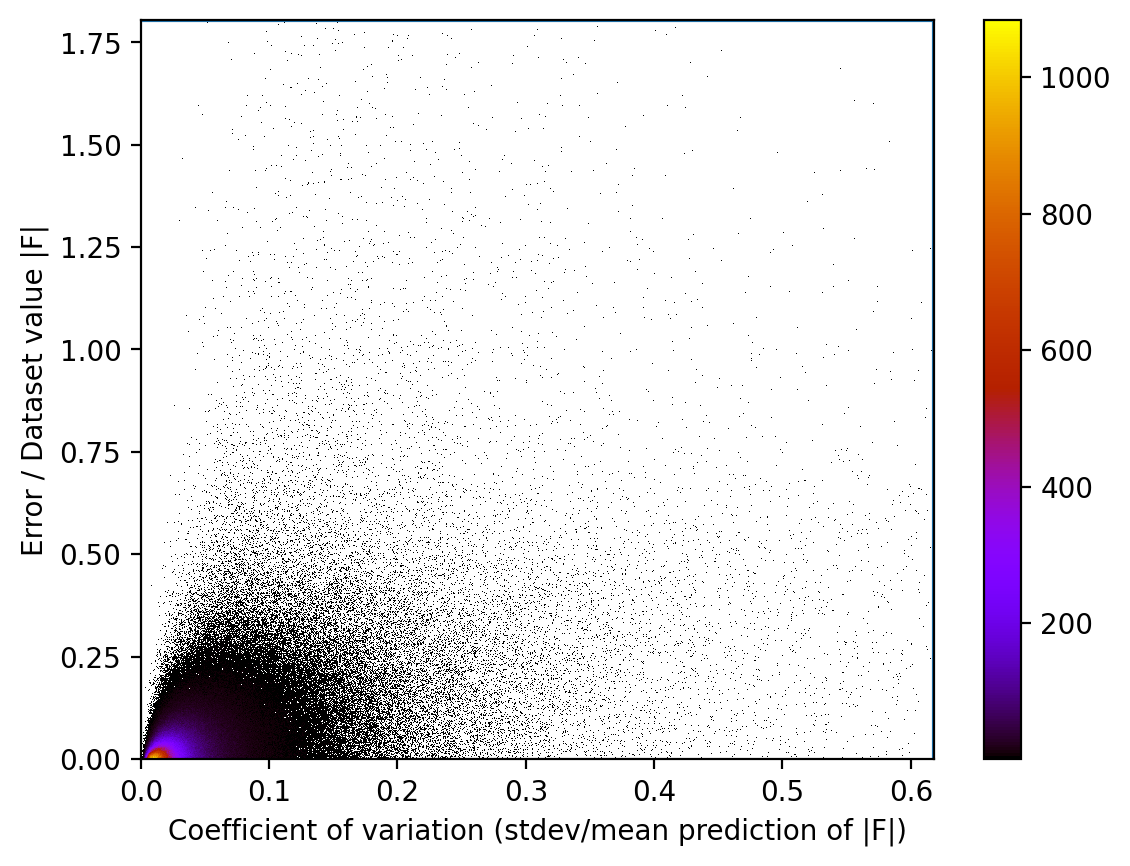

In [12]:
x = df['Coef_var']
y = df['Relative difference']
print(len(x))
xquant95 = np.quantile(x,0.999)
yquant95 = np.quantile(y,0.999)
plt.hist2d(x,y,bins=(math.isqrt(len(df)),math.isqrt(len(df))),cmin=1,cmap=plt.cm.gnuplot, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Coefficient of variation (stdev/mean prediction of |F|)')
plt.ylabel('Error / Dataset value |F|')#, fontdict=font)
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

1352100


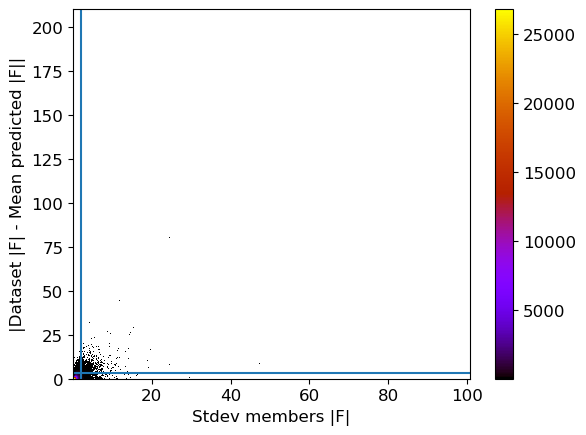

In [10]:
x = h_df['Stdev magnitudes'].to_numpy()
y = h_df['Difference'].to_numpy()
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(h_df)),math.isqrt(len(h_df))),cmin=1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

In [5]:
x = c_df['Stdev magnitudes'].to_numpy()
y = c_df['Difference'].to_numpy()
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(c_df)),math.isqrt(len(c_df))),cmin=1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

NameError: name 'c_df' is not defined

193592


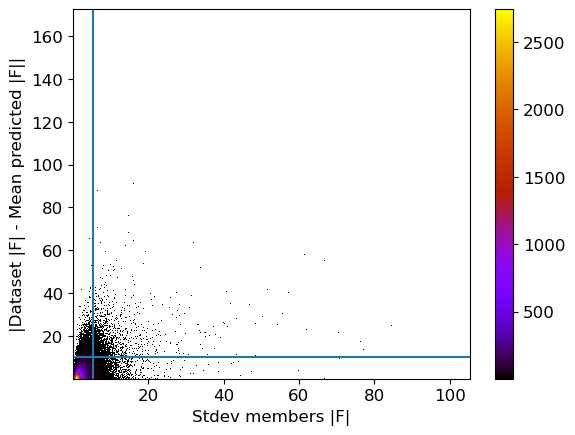

In [12]:
x = n_df['Stdev magnitudes'].to_numpy()
y = n_df['Difference'].to_numpy()
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(n_df)),math.isqrt(len(n_df))),cmin=1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

172475


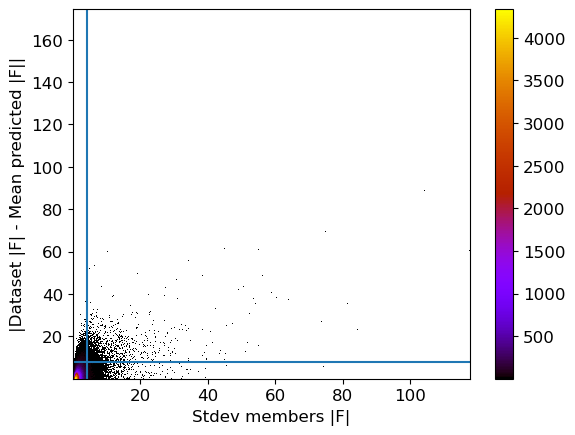

In [13]:
x = o_df['Stdev magnitudes'].to_numpy()
y = o_df['Difference'].to_numpy()
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(o_df)),math.isqrt(len(o_df))),cmin=1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

In [14]:
print(sum([len(h_df),len(c_df),len(n_df),len(o_df)]))

2608858


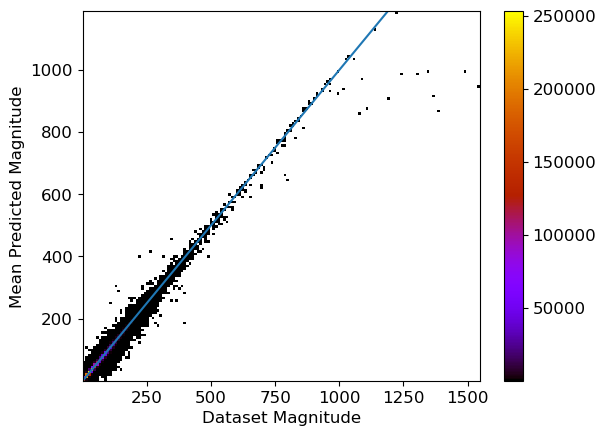

In [15]:
x = df['Dataset magnitudes'].to_numpy()
y = df['Mean magnitudes'].to_numpy()
xquant95 = np.quantile(x,0.99)
yquant95 = np.quantile(y,0.99)

plt.hist2d(x,y,bins=(150,150),cmin=0.1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Dataset Magnitude')
plt.ylabel('Mean Predicted Magnitude')
plt.axline((0, 0), slope=1)
plt.colorbar()
plt.show()

890691


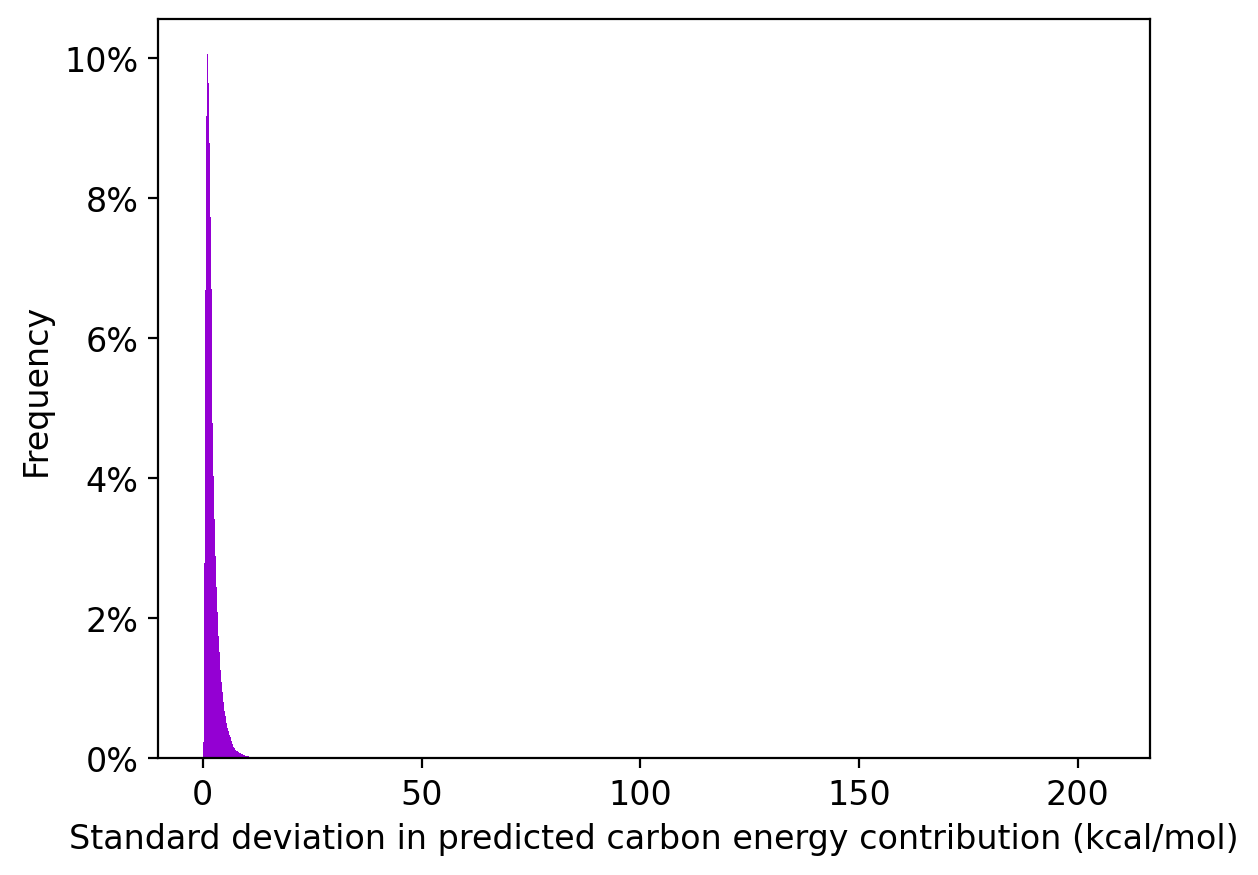

In [27]:
from matplotlib.ticker import PercentFormatter
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
# Carbon histograms
print(len(c_df))



plt.hist(c_df['Stdev magnitudes'],bins=math.isqrt(len(c_df)),weights=(np.ones(len(c_df)) / len(c_df)),color='darkviolet')#, range=[0,10])

plt.gca().yaxis.set_major_formatter(PercentFormatter(1,decimals=0))

#plt.axvline(x = 7.436886, color = 'r', label = 'axvline - full height')


plt.xlabel('Standard deviation in predicted carbon energy contribution (kcal/mol)')
plt.ylabel('Frequency')
#plt.title('ANI-1x first conformer subset')
plt.show()

# Convert Dataset magnitudes column
magnitudes_df['Dataset magnitudes'] = magnitudes_df['Dataset magnitudes'].apply(lambda x: x.numpy())

# Convert Members magnitudes column
magnitudes_df['Members magnitudes'] = magnitudes_df['Members magnitudes'].apply(lambda x: np.array([item.numpy() for item in x]))

# Convert Mean magnitudes column
magnitudes_df['Mean magnitudes'] = magnitudes_df['Mean magnitudes'].apply(lambda x: x.numpy())

# Convert Stdev magnitudes column
magnitudes_df['Stdev magnitudes'] = magnitudes_df['Stdev magnitudes'].apply(lambda x: x.numpy())

# Convert Difference column
magnitudes_df['Difference'] = magnitudes_df['Difference'].apply(lambda x: x.numpy())

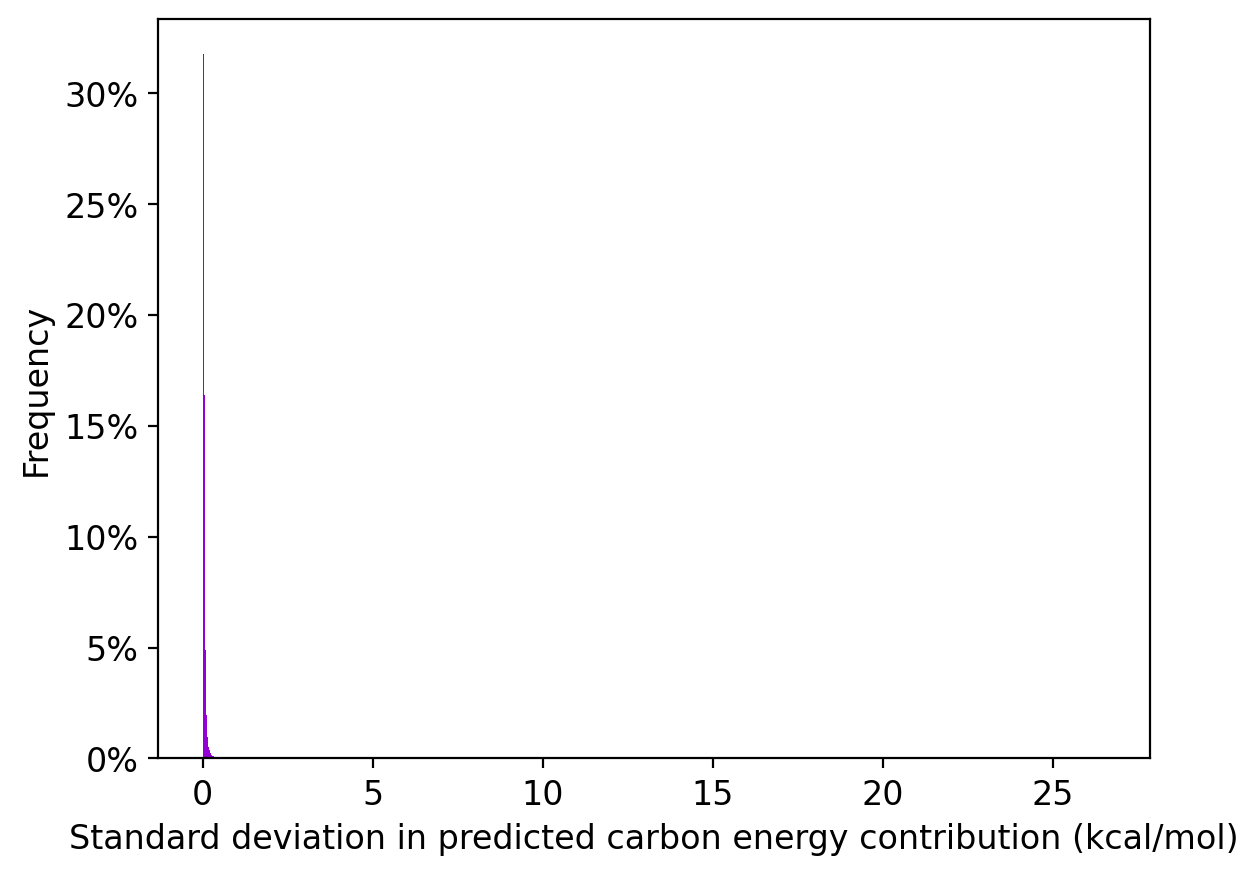

In [31]:
data = df['Stdev magnitudes'] / df['Mean magnitudes']



plt.hist(data,bins=math.isqrt(len(data)),weights=(np.ones(len(data)) / len(data)),color='darkviolet')#, range=[0,10])

plt.gca().yaxis.set_major_formatter(PercentFormatter(1,decimals=0))

#plt.axvline(x = 7.436886, color = 'r', label = 'axvline - full height')


plt.xlabel('Standard deviation in predicted carbon energy contribution (kcal/mol)')
plt.ylabel('Frequency')
#plt.title('ANI-1x first conformer subset')
plt.show()